In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "single_defect"

os.makedirs(output_dir, exist_ok=True)

# Pure state with single defect on one side

In [3]:
ne = 1000
n_layers = 10000

single_filename = os.path.join(output_dir, "single_defect_chain_start_left.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_purities = arr['data']
else:
    all_purities = []

    ls = 10*numpy.arange(1,11)
    for l in tqdm(ls):
        state = numpy.array([1] + [0]*(l-1), dtype=numpy.complex128)
        part_on_bound = py_entropy.SingleDefectState(state, num_experiments=ne)
        purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
        all_purities.append(purities)
    pure_purities = numpy.array(all_purities)
    numpy.savez(single_filename, ls=ls, data=pure_purities)
    
print(f"Purity shape: {pure_purities.shape}")

Purity shape: (10, 10000)


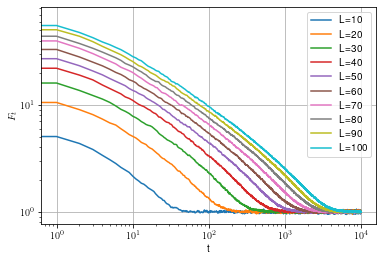

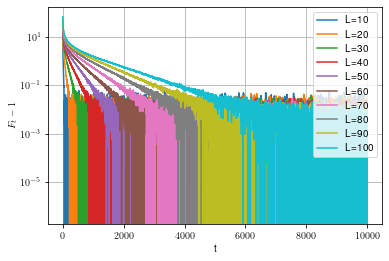

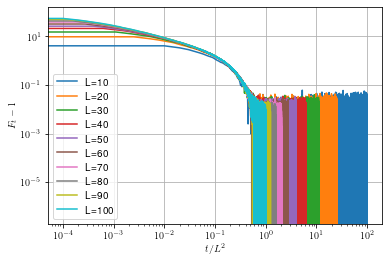

In [4]:
for l, purity in zip(ls, pure_purities):
    pyplot.plot(l*purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_purities):
    pyplot.plot(l*purity - 1, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator_diff.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator_diff_scaled.pdf'))
pyplot.show()

# Pure with defect on either side

$$\rho = \frac{1}{2}\left(\vert 0 \rangle + \vert L-1 \rangle \right)\left(\langle 0 \vert + \langle L-1 \vert \right)$$

In [10]:
ne = 1000
n_layers = 10000

single_filename = os.path.join(output_dir, "single_defect_chain_start_both.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_both_purities = arr['data']
else:
    all_purities = []

    ls = 10*numpy.arange(1,11)
    for l in tqdm(ls):
        state = numpy.array([1/numpy.sqrt(2)] + [0]*(l-2) + [1/numpy.sqrt(2)], dtype=numpy.complex128)
        part_on_bound = py_entropy.SingleDefectState(state, num_experiments=ne)
        purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
        all_purities.append(purities)
    pure_both_purities = numpy.array(all_purities)
    numpy.savez(single_filename, ls=ls, data=pure_both_purities)
    
print(f"Purity shape: {pure_both_purities.shape}")

Purity shape: (10, 10000)


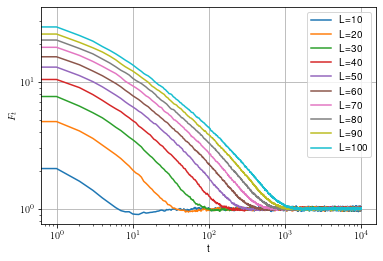

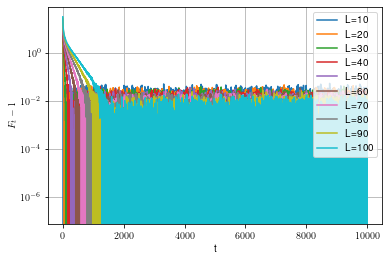

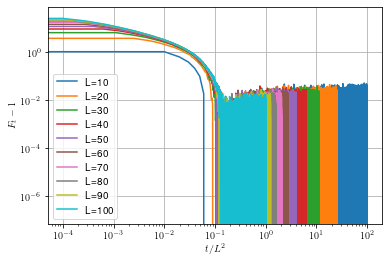

In [11]:
for l, purity in zip(ls, pure_both_purities):
    pyplot.plot(l*purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'twinpurestate_estimator.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_both_purities):
    pyplot.plot(l*purity - 1, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'twinpurestate_estimator_diff.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_both_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'twinpurestate_estimator_diff_scaled.pdf'))
pyplot.show()

# Mixed state with single defect either side

$$\rho = \frac{1}{2}\vert 0 \rangle \langle 0 \vert + \frac{1}{2} \vert L-1 \rangle \langle L-1 \vert$$

In [30]:
ne = 1000
n_layers = 10000


single_mixed_filename = os.path.join(output_dir, "single_defect_chain_start_mixed.npz")

if os.path.exists(single_mixed_filename):
    arr = numpy.load(single_mixed_filename)
    ls = arr['ls']
    mixed_purities = arr['data']
else:
    all_purities = []

    ls = 10*numpy.arange(1,11)


    for l in tqdm(ls):
        all_states = []

        x = [0]*l
        x[0] = 1
        all_states.append(numpy.asarray(x, dtype=numpy.complex128))

        x = [0]*l
        x[-1] = 1
        all_states.append(numpy.asarray(x, dtype=numpy.complex128))

        part_on_bound = py_entropy.SingleDefectState.new_mixed([(0.5, s) for s in all_states], num_experiments=ne)
        purities = part_on_bound.apply_alternative_layers_and_save_mean_purity(n_layers)
        all_purities.append(purities)
    mixed_purities = numpy.array(all_purities)
    numpy.savez(single_mixed_filename, ls=ls, data=mixed_purities)

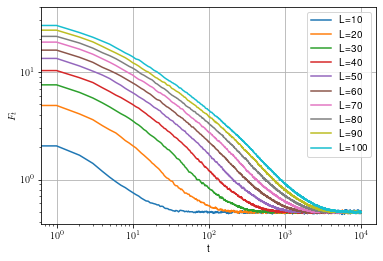

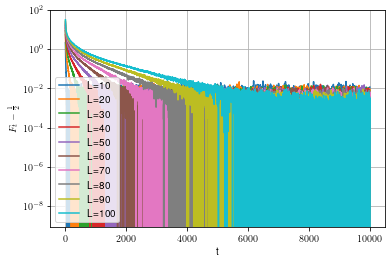

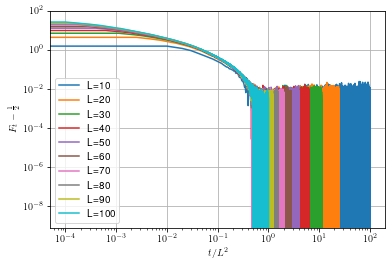

In [27]:
for l, purity in zip(ls, mixed_purities):
    pyplot.plot(l*purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'mixed_estimator.pdf'))
pyplot.show()

for l, purity in zip(ls, mixed_purities):
    pyplot.plot(l*purity - 0.5, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel(r'$F_t - \frac{1}{2}$')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'mixed_estimator_diff.pdf'))
pyplot.show()

for l, purity in zip(ls, mixed_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity - 0.5, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$F_t - \frac{1}{2}$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'mixed_estimator_diff_scaled.pdf'))
pyplot.show()

# Compare pure versus mixed 

Its hard to distiguish two categories of multiple plots, if you think these are important I'll work on clarifying them (maybe cool colors for pure states and warm colors for mixed?)

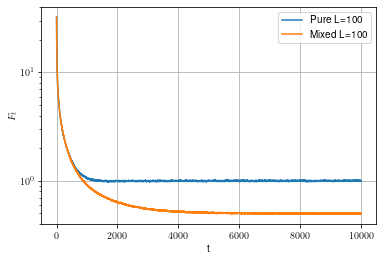

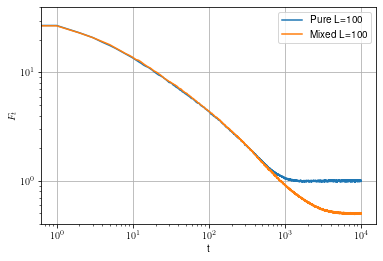

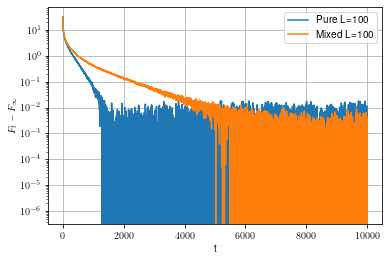

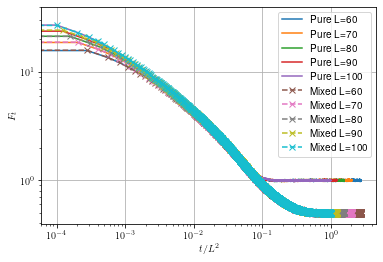

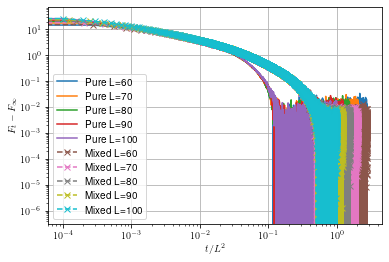

In [29]:
for l, purity in zip(ls[-1:], pure_both_purities[-1:]):
    pyplot.plot(l*purity, label=f"Pure L={l}")
for l, purity in zip(ls[-1:], mixed_purities[-1:]):
    pyplot.plot(l*purity, label=f"Mixed L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel(r'$F_t$')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'compare_estimator.pdf'))
pyplot.show()

for l, purity in zip(ls[-1:], pure_both_purities[-1:]):
    pyplot.plot(l*purity, label=f"Pure L={l}")
for l, purity in zip(ls[-1:], mixed_purities[-1:]):
    pyplot.plot(l*purity, label=f"Mixed L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel(r'$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'compare_estimator_loglog.pdf'))
pyplot.show()

for l, purity in zip(ls[-1:], pure_both_purities[-1:]):
    pyplot.plot(l*purity - 1.0, label=f"Pure L={l}")
for l, purity in zip(ls[-1:], mixed_purities[-1:]):
    pyplot.plot(l*purity - 0.5, label=f"Mixed L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel(r'$F_t - F_\infty$')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'compare_estimator_diff.pdf'))
pyplot.show()

for l, purity in zip(ls[5:], pure_both_purities[5:]):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity, '-', label=f"Pure L={l}")
for l, purity in zip(ls[5:], mixed_purities[5:]):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity, 'x--', label=f"Mixed L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$F_t$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'compare_estimator_scaled.pdf'))
pyplot.show()

for l, purity in zip(ls[5:], pure_both_purities[5:]):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity - 1.0, '-', label=f"Pure L={l}")
for l, purity in zip(ls[5:], mixed_purities[5:]):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), l*purity - 0.5, 'x--', label=f"Mixed L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$F_t - F_\infty$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'compare_estimator_diff_scaled.pdf'))
pyplot.show()